In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [4]:

# Load the dataset
df = pd.read_csv('../../../data/XAUUSD_2010-2023.csv')
df = df.head(100_000)
df

,time,open,high,low,close,rsi14,sma14
0,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95,81.98,1096.38
1,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75,79.17,1096.72
2,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45,75.02,1097.03
3,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45,75.02,1097.30
4,2010-01-03 18:20:00,1099.40,1099.60,1098.90,1098.90,67.50,1097.50
...,...,...,...,...,...,...,...
99995,2011-05-23 20:00:00,1514.23,1514.83,1513.88,1514.73,44.35,1514.50
99996,2011-05-23 20:05:00,1514.78,1515.53,1514.58,1515.23,51.24,1514.50
99997,2011-05-23 20:10:00,1515.18,1515.88,1515.13,1515.43,53.71,1514.51
99998,2011-05-23 20:15:00,1515.38,1516.78,1515.38,1516.63,65.12,1514.62


In [8]:

# Convert the 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

In [9]:

# Create a target variable
df['price_increase'] = (df['close'] > df['open']).astype(int)

In [10]:

# Select relevant features for classification
features = ['open', 'high', 'low', 'close', 'rsi14', 'sma14']
X = df[features]
y = df['price_increase']

In [11]:

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:

# Initialize and train the Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:

# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [15]:

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[7619 2498]
 [2954 6929]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74     10117
           1       0.74      0.70      0.72      9883

    accuracy                           0.73     20000
   macro avg       0.73      0.73      0.73     20000
weighted avg       0.73      0.73      0.73     20000


Accuracy Score:
0.7274


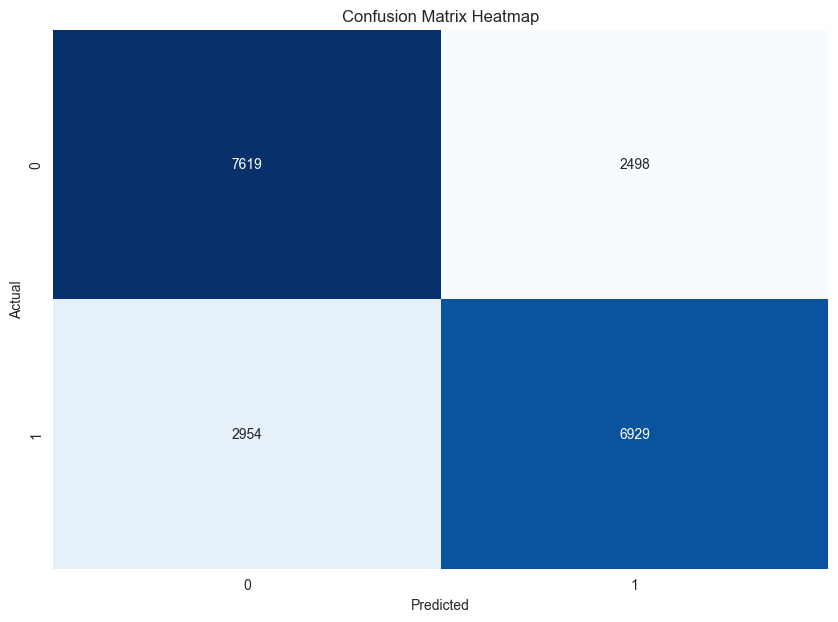

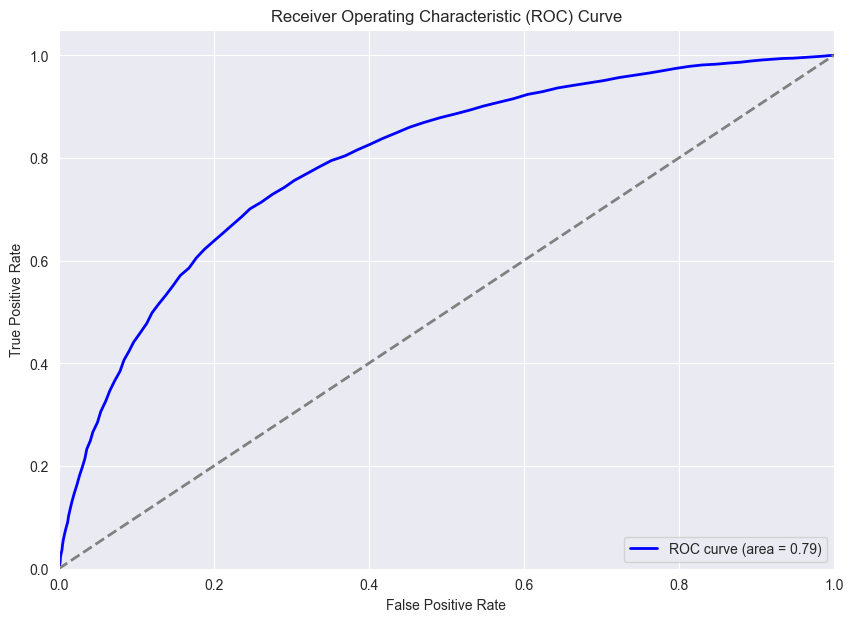

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# ROC Curve
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
